# Linear Regression

Despite knowing that Linear Regresion wouldn't work in this case, a basic linear regression model is used in order to get some baseline predictions. We fit the model to use mean squared log error as a reference to check how good the other models are performing. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [2]:
df_bike_trips_hourly = pd.read_parquet('../../data/bike_trips_hourly_FINAL.parquet')
df_bike_trips_hourly.head()

,starting_trips,ending_trips,Most_Occuring_Starting_Neighborhood,min_temp,precip,hour,season
index,,,,,,,
2016-01-01 00:00:00,26.0,17.0,109,6.7,0.0,0,4
2016-01-01 01:00:00,39.0,32.0,112,7.2,0.0,1,4
2016-01-01 02:00:00,33.0,37.0,87,6.7,0.0,2,4
2016-01-01 03:00:00,6.0,10.0,116,6.7,0.0,3,4
2016-01-01 04:00:00,1.0,1.0,104,6.1,0.0,4,4


In [3]:
#drop date, because it is already in the index
df_bike_trips_hourly.drop(['ending_trips'] , axis=1, inplace=True)
#drop ending trips.. would be confusing I suppose..? 

df_bike_trips_hourly.head()

,starting_trips,Most_Occuring_Starting_Neighborhood,min_temp,precip,hour,season
index,,,,,,
2016-01-01 00:00:00,26.0,109,6.7,0.0,0,4
2016-01-01 01:00:00,39.0,112,7.2,0.0,1,4
2016-01-01 02:00:00,33.0,87,6.7,0.0,2,4
2016-01-01 03:00:00,6.0,116,6.7,0.0,3,4
2016-01-01 04:00:00,1.0,104,6.1,0.0,4,4


## Define X and Y

In [6]:
X = df_bike_trips_hourly[['min_temp', 'precip', 'hour','season', 'Most_Occuring_Starting_Neighborhood']]
X_sds = StandardScaler().fit_transform(X)
Y = df_bike_trips_hourly['starting_trips']
# Try standardscaler or reshape function

## Train the model on the training set

In [7]:
#random_state 0, so it stays the same verytime we run it
#30-70 split 
X_train, X_test, Y_train, Y_test = train_test_split(X_sds, Y, test_size = 0.3, random_state = 0)

In [8]:
regression = LinearRegression().fit(X_train, Y_train)


## Predict the test set results

In [9]:
Y_pred = regression.predict(X_test)
print(Y_pred)

[15.14978146 98.74837275 24.72465795 ... 33.85544591 48.0810846
 85.30569715]


## Evaluate the model

In [10]:
print(f"MAE: {mean_absolute_error(Y_test, Y_pred):.2f}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred):.2f}")
print(f"MAPE: {(mean_absolute_error(Y_test, Y_pred) / Y_test.mean()) * 100:.2f}%")
print(f"RMSE: {mean_squared_error(Y_test, Y_pred, squared=False):.2f}")
print(f"R^2: { r2_score(Y_test, Y_pred):.2f}")

MAE: 46.93
MSE: 4022.72
MAPE: 61.64%
RMSE: 63.42
R^2: 0.24


## Plot the results

Text(0, 0.5, 'Predicted')

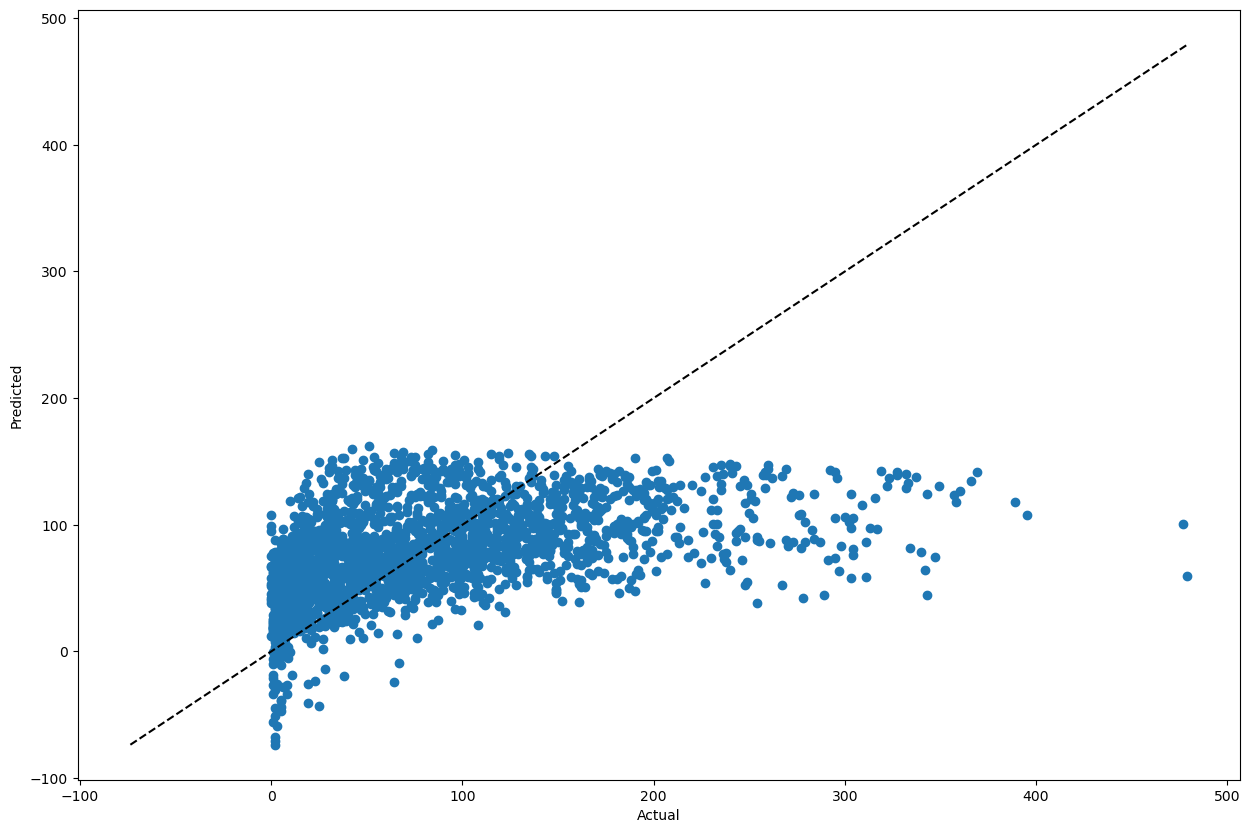

In [11]:
# Create a scatterplot of the actual and predicted values for the test data
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_pred)

#To Do the line as visualization

# Plot the line y=x as a reference
min_val = min(min(Y_test), min(Y_pred))
max_val = max(max(Y_test), max(Y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

plt.xlabel('Actual')
plt.ylabel('Predicted')

# One way to validate the predictions made by your machine learning model is to
# compare the predicted values to the actual values on a plot. This can help you
# visualize how well the model is performing and identify any patterns or trends
# in the data.
#
# For example, if you are using a linear regression model to predict total hourly
# demand for bike rentals, you can create a scatterplot of the actual values and
# the predicted values. If the model is performing well, the points on the
# scatterplot should be close to the line y=x, which indicates a good fit. If the
# points are widely scattered or form a non-linear pattern, this may indicate
# that the model is not performing well and that the predictions may not be
# accurate.
#
# In addition to visualizing the predictions, you can also use error metrics to
# evaluate the performance of your model. For example, you can use mean absolute
# error (MAE) or mean squared error (MSE) to quantify the difference between the
# predicted values and the actual values. These error metrics can help you compare
# the performance of different models and choose the best one for your problem.
#
# It is also a good idea to use a variety of techniques and approaches to validate
# the predictions made by your model. This can help you get a more accurate picture
# of the model's performance and how it might perform on new, unseen data.